In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

def detect_lines(img, threshold1 = 50, threshold2 = 150, apertureSize = 3, minLineLength = 100, maxLineGap = 10):
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert to grayscale
    grayCon = cv2.addWeighted(gray, 2, gray, 0, 0)
    edges = cv2.Canny(grayCon, threshold1, threshold2, apertureSize=apertureSize) # detect edges
    lines = cv2.HoughLinesP(
                    edges,
                    1,
                    np.pi/180,
                    100,
                    minLineLength=minLineLength,
                    maxLineGap=maxLineGap,
            ) # detect lines

    lineList = []
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            linexy = [x1, y1, x2, y2]
            cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            lineList.append(linexy)
    return lineList

In [31]:
poolImgLanes = detect_lines('lanes.png', 200, 220, 5, 200)
poolImgLanes

[[1302, 1637, 1426, 1423], [1415, 2108, 1470, 1902]]

In [32]:
# imageIg = cv2.imread('lanes.png')
# g= cv2.cvtColor(imageIg, cv2.COLOR_BGR2GRAY)
# print(g[len(g)-1][1000:1500])
# plt.imshow(cv2.cvtColor(imageIg, cv2.COLOR_BGR2GRAY), cmap="gray", vmin=0, vmax=255)

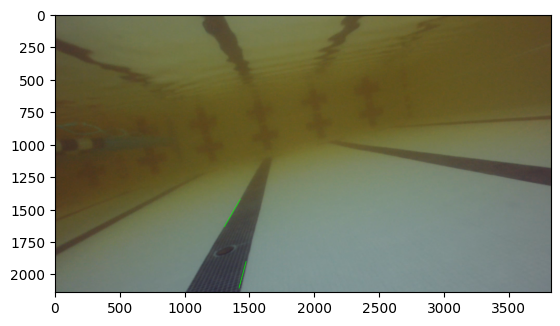

In [33]:
def draw_lines(img, lines, color = (0, 255, 0)):
    image = cv2.imread(img)
    for line in lines:
        cv2.line(image, (line[0], line[1]), (line[2], line[3]), color, 3) 
    return image

plt.imshow(draw_lines('lanes.png', poolImgLanes))

In [34]:
def get_slopes_intercepts(img, lines):
    image = img
    slopes = []
    intercepts = []
    height = image.shape[0]
    for line in lines:
        slope = (line[1] - line[3]) / (line[0] - line[2])
        slopes.append(slope)
        intercepts.append((height-line[1])/slope + line[0])
    return slopes, intercepts

In [35]:
def detect_lanes(imageInput, lines):
    image = cv2.imread(imageInput)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    slopes, intercepts = get_slopes_intercepts(img, lines)
    lineDict = dict(sorted(zip(intercepts, slopes)))
    height = img.shape[0]
    possibleLanes = []

    # finding lines with similar slopes and intercepts
    for i in range(1, len(lineDict)):
        # checks if slopes and intercepts are similar
        intercept1, intercept2 = list(lineDict)[i-1], list(lineDict)[i]
        slope1, slope2 = list(lineDict.values())[i-1], list(lineDict.values())[i]
        if abs(intercept1 - intercept2) < 500 and abs(slope1 - slope2) < 3:
            # find the fuckin in between line darkness
            centerM2 = int((intercept1 + intercept2) / 2 - 2)
            averageDark = 0
            for pixel in range(centerM2, (centerM2 + 5)):
                colorValue = img[(height-2), pixel]
                averageDark += colorValue
            if (averageDark/5) <= 75:
            # finds indices of lines list that correspond to lanes
                index1, index2 = intercepts.index(list(lineDict)[i-1]), intercepts.index(list(lineDict)[i])
                line1, line2 = lines[index1], lines[index2]
                possibleLanes.append(line1, line2)
    return possibleLanes 

In [36]:
poolImgLanes

[[1302, 1637, 1426, 1423], [1415, 2108, 1470, 1902]]

In [37]:
myFuckinLanes = detect_lanes('lanes.png', poolImgLanes)
myFuckinLanes

[[[1302, 1637, 1426, 1423], [1415, 2108, 1470, 1902]]]

In [38]:
emily = cv2.imread('lanes.png')
slopes, intercepts = get_slopes_intercepts(emily, poolImgLanes)
lineDict = dict(sorted(zip(intercepts, slopes)))
lineDict

list(lineDict.values())[0]
# list(lineDict)[1]

-1.7258064516129032

In [39]:
type(emily)

numpy.ndarray

In [40]:
def draw_lanes(img, lanes):
    image = cv2.imread(img)
    for lane in lanes:
        cv2.line(image, (lane[0], lane[1]), (lane[2], lane[3]), (0, 255, 255), 4) 
    return image

In [42]:
draw_lanes('lanes.png', myFuckinLanes)

IndexError: list index out of range